In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv('../data/admission.csv')

In [4]:
data.head()


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [6]:
data.shape

(500, 9)

In [7]:
data.drop('Serial No.',axis=1, inplace=True)

In [9]:
data.rename({'Chance of Admit ':'Chance of Admit','LOR ':'LOR'},axis=1,inplace=True)

# EDA

In [12]:
data.head(10)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
5,330,115,5,4.5,3.0,9.34,1,0.90
6,321,109,3,3.0,4.0,8.20,1,0.75
7,308,101,2,3.0,4.0,7.90,0,0.68
8,302,102,1,2.0,1.5,8.00,0,0.50
9,323,108,3,3.5,3.0,8.60,0,0.45


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


## Outlier detection

In [128]:
from collections import Counter
def detect_outliers(df,n,features):
    outlier_indices=[]
    
    for col in features:
        Q1=np.percentile(df[col],25)
        Q3=np.percentile(df[col],75)
        IQR=Q3-Q1
        step=IQR*1.5
        outlier_list_col=df[(df[col]<Q1 -step) | (df[col]>Q3+step)].index
        outlier_indices.extend(outlier_list_col)
        
    outlier_indices=Counter(outlier_indices)
    multiple_outliers=list(k for k,v in outlier_indices.items() if v>n)
    return multiple_outliers


In [130]:
outliers_to_drop=detect_outliers(data,2,['GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR', 'CGPA', 'Research'])

In [133]:
data.loc[outliers_to_drop]
#  No outliers


,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit


In [14]:
data.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


Text(0.5, 1.0, 'Correlation matrix heat map')

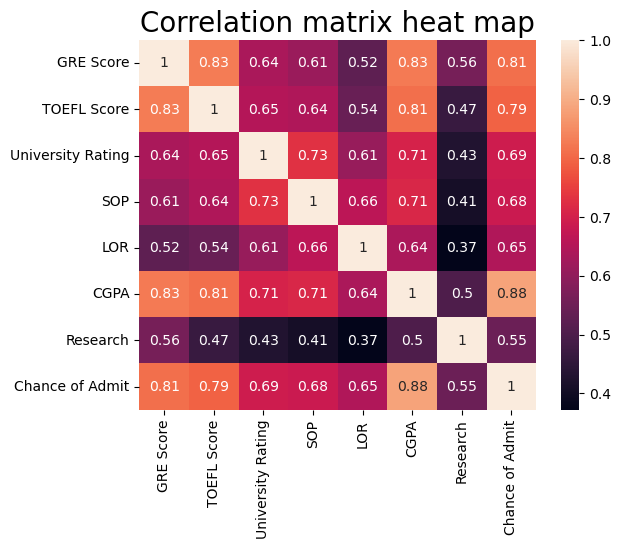

In [15]:
sns.heatmap(data.corr(),annot=True).set_title('Correlation matrix heat map', color='black',size='20')

### GRE SCORES

In [16]:
GRE=pd.DataFrame(data['GRE Score'])

In [17]:
GRE.describe()

,GRE Score
count,500.000000
mean,316.472000
std,11.295148
min,290.000000
25%,308.000000
50%,317.000000
75%,325.000000
max,340.000000


/tmp/ipykernel_13153/1782698451.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(GRE).set_title('Probabitlity Dsitribution for GRE',size='20')


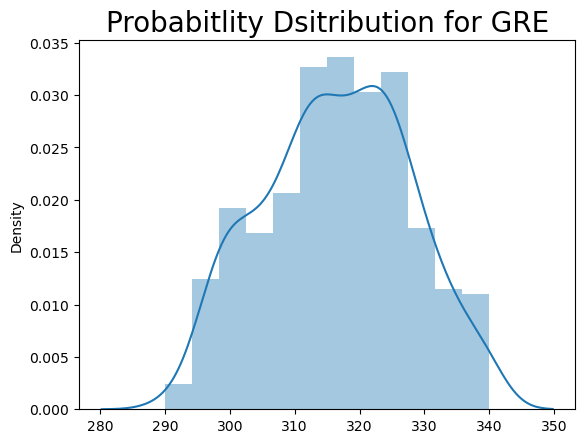

In [20]:
sns.distplot(GRE).set_title('Probabitlity Dsitribution for GRE',size='20')
plt.show()

In [22]:
# the distrbution seems to be normal
GRE_CORR=pd.DataFrame(data.corr()['GRE Score'])
GRE_CORR.drop('GRE Score',axis=0,inplace=True)

In [23]:
GRE_CORR.rename({'GRE Score':'GRE CorrCoef'},axis=1,inplace=True)
GRE_CORR

,GRE CorrCoef
TOEFL Score,0.827200
University Rating,0.635376
SOP,0.613498
LOR,0.524679
CGPA,0.825878
Research,0.563398
Chance of Admit,0.810351


### TOEFL SCORE

In [26]:
TOEFL=pd.DataFrame(data['TOEFL Score'],columns=['TOEFL Score'])

In [28]:
TOEFL.describe()

,TOEFL Score
count,500.000000
mean,107.192000
std,6.081868
min,92.000000
25%,103.000000
50%,107.000000
75%,112.000000
max,120.000000


/tmp/ipykernel_13153/1651487215.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(TOEFL).set_title('Probability distribution for TOEFL score',size='20')


Text(0.5, 1.0, 'Probability distribution for TOEFL score')

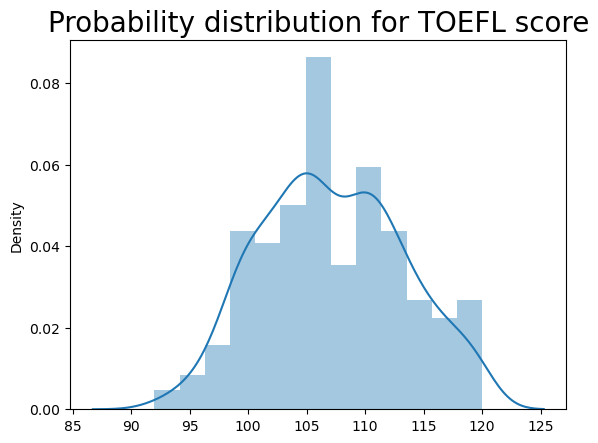

In [29]:
sns.distplot(TOEFL).set_title('Probability distribution for TOEFL score',size='20')

# CGPA

In [30]:
CGPA=pd.DataFrame(data['CGPA'], columns=['CGPA'])

,CGPA
0,9.65
1,8.87
2,8.00
3,8.67
4,8.21
...,...
495,9.02
496,9.87
497,9.56
498,8.43


In [33]:
CGPA.describe()

,CGPA
count,500.000000
mean,8.576440
std,0.604813
min,6.800000
25%,8.127500
50%,8.560000
75%,9.040000
max,9.920000


/tmp/ipykernel_13153/2031870314.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(CGPA).set_title('Probability distrbution for CGPA',size='20')


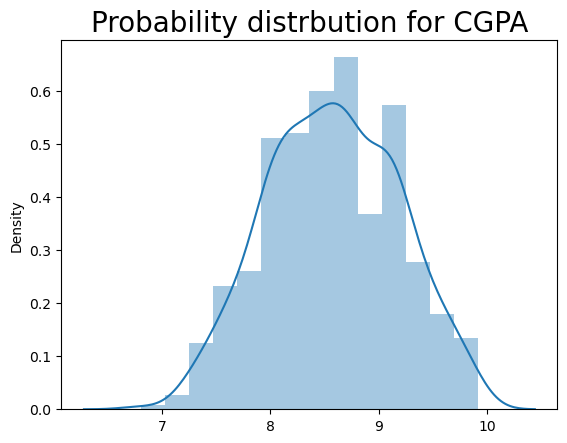

In [34]:
sns.distplot(CGPA).set_title('Probability distrbution for CGPA',size='20')
plt.show()

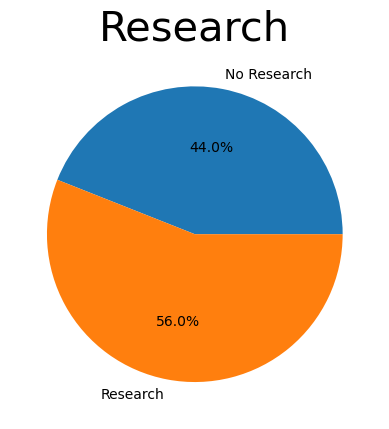

In [37]:
# Research
RES_Count=data.groupby(['Research']).count()
RES_Count=RES_Count['GRE Score']
RES_Count=pd.DataFrame(RES_Count)
RES_Count.rename({'GRE Score':'count'}, axis=1, inplace=True)
RES_Count.rename({0:'No Research',1:'Research'}, axis=0, inplace=True)
plt.pie(x=RES_Count['count'],labels=RES_Count.index,autopct='%1.1f%%')
plt.title('Research', pad=5,size=30)
plt.show()

## University Rating

In [40]:
University_Rating=data.groupby(['University Rating']).count()
University_Rating = University_Rating['GRE Score']
University_Rating = pd.DataFrame(University_Rating)
University_Rating.rename({'GRE Score': 'Count'}, inplace=True, axis=1)
University_Rating

,Count
University Rating,
1,34
2,126
3,162
4,105
5,73


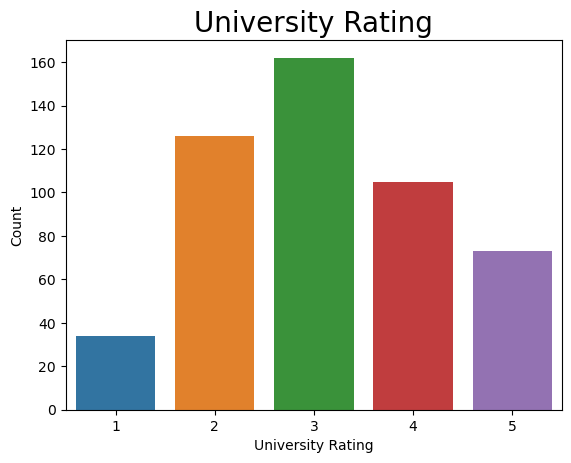

In [49]:
sns.barplot(x=University_Rating.index, y=University_Rating['Count']).set_title('University Rating', size='20')
plt.show()

## SOP

In [46]:
SOP=pd.DataFrame(data.groupby(['SOP']).count()['GRE Score'])
SOP.rename({'GRE Score':'Count'}, axis=1, inplace=True)
SOP

,Count
SOP,
1.0,6
1.5,25
2.0,43
2.5,64
3.0,80
3.5,88
4.0,89
4.5,63
5.0,42


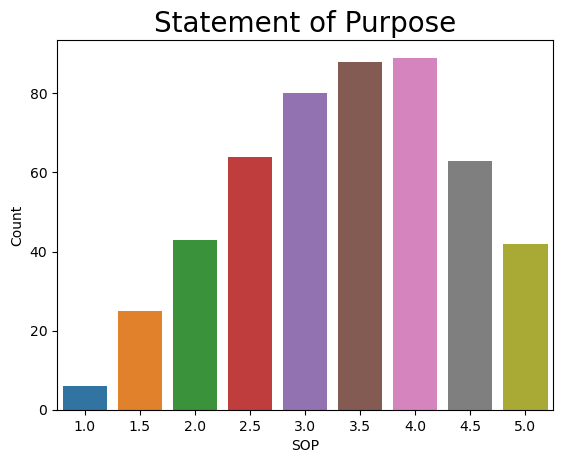

In [48]:
sns.barplot(x=SOP.index,y=SOP['Count']).set_title('Statement of Purpose', size=20)
plt.show()

## LOR

In [50]:
LOR=pd.DataFrame(data.groupby(['LOR']).count()['GRE Score'])
LOR.rename({'GRE Score':'Count'}, axis=1, inplace=True)
LOR

,Count
LOR,
1.0,1
1.5,11
2.0,46
2.5,50
3.0,99
3.5,86
4.0,94
4.5,63
5.0,50


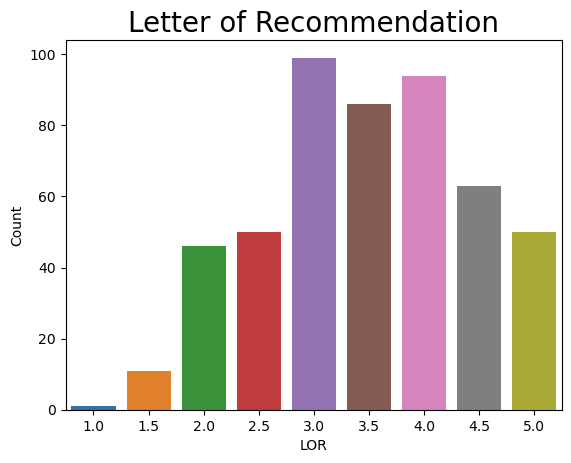

In [52]:
sns.barplot(x=LOR.index, y=LOR['Count']).set_title('Letter of Recommendation', size='20')
plt.show()

## Chance of Admission


/tmp/ipykernel_13153/3099877496.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Chance of Admit']).set_title('Probabitlity Distribution of Chance of Admit',size=20)


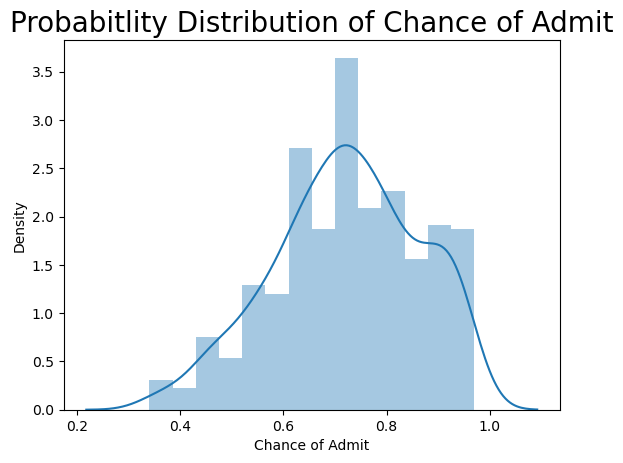

In [55]:
sns.distplot(data['Chance of Admit']).set_title('Probabitlity Distribution of Chance of Admit',size=20)
plt.show()

In [56]:
data.describe()['Chance of Admit']

count    500.00000
mean       0.72174
std        0.14114
min        0.34000
25%        0.63000
50%        0.72000
75%        0.82000
max        0.97000
Name: Chance of Admit, dtype: float64

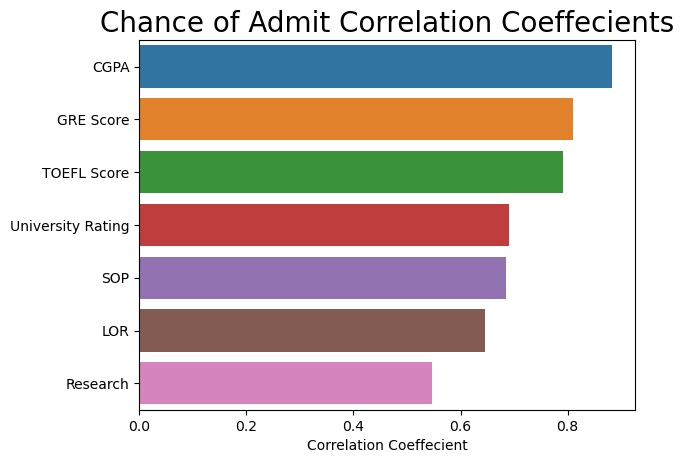

In [57]:
COA_corr = pd.DataFrame(data.corr()['Chance of Admit'])
COA_corr.rename({'Chance of Admit': 'Correlation Coeffecient'}, axis=1, inplace=True)
COA_corr.drop('Chance of Admit', inplace=True)
COA_corr.sort_values(['Correlation Coeffecient'], ascending=False, inplace=True)
COA_corr_x = COA_corr.index
COA_corr_y = COA_corr['Correlation Coeffecient']
sns.barplot(y=COA_corr_x,x=COA_corr_y).set_title('Chance of Admit Correlation Coeffecients', size='20')
plt.show()

In [58]:
COA_corr

,Correlation Coeffecient
CGPA,0.882413
GRE Score,0.810351
TOEFL Score,0.792228
University Rating,0.690132
SOP,0.684137
LOR,0.645365
Research,0.545871


#  Regression Algorithms

In [59]:
X=data.drop(['Chance of Admit'],axis=1)
y=data['Chance of Admit']

In [63]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X[['CGPA','GRE Score','TOEFL Score']]=scaler.fit_transform(X[['CGPA','GRE Score','TOEFL Score']])

In [65]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=101)

In [66]:
### Linear Regression(All features)

In [67]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [68]:
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)

In [69]:
y_pred

array([0.74016424, 0.90998662, 0.80977796, 0.62717443, 0.64897059,
       0.69338422, 0.91716973, 0.51823952, 0.95444672, 0.73299414,
       0.70056244, 0.62304579, 0.55971464, 0.63808617, 0.78415015,
       0.58515234, 0.50616797, 0.8539437 , 0.75387314, 0.57864313,
       0.85054221, 0.84573729, 0.76055796, 0.81290846, 0.61159812,
       0.83820931, 0.47720974, 0.72044932, 0.74644509, 0.84373554,
       0.65303207, 0.83537532, 0.88472257, 0.67392157, 0.63002661,
       0.82115804, 0.71182823, 0.6142928 , 0.77429   , 0.68943831,
       0.87252824, 0.59562973, 0.86607031, 0.76729128, 0.84248883,
       0.72493781, 0.74166787, 0.70174479, 0.78309949, 0.88063128,
       0.57186138, 0.96041214, 0.55784295, 0.64860993, 0.61843992,
       0.62620289, 0.89914534, 0.86180039, 0.85950645, 0.69653906,
       0.91392034, 0.70831698, 0.62012115, 0.81050984, 0.62831308,
       0.7688189 , 0.72696769, 0.78168448, 0.69166049, 0.82326518,
       0.81578436, 0.79318294, 0.94913398, 0.67469479, 0.74495

In [71]:
pd.DataFrame({'Actual':y_test,"Predict":y_pred}).head()

,Actual,Predict
18,0.63,0.740164
361,0.93,0.909987
104,0.74,0.809778
4,0.65,0.627174
156,0.70,0.648971


In [72]:
from sklearn.metrics import r2_score,mean_squared_error
lr_r2=r2_score(y_test,y_pred)
lr_mse=mean_squared_error(y_test,y_pred)
lr_rmse=np.sqrt(lr_mse)
print('Linear Regression  R2 Score :{0} \n Linear Regression MSE:{1}, \n Linear Regression RMSE:{2}'.format(lr_r2,lr_mse,lr_rmse))

Linear Regression  R2 Score :0.8126327365181198 
 Linear Regression MSE:0.0035190869745734383, 
 Linear Regression RMSE:0.05932189287753248


/tmp/ipykernel_13153/2212574359.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test-y_pred))


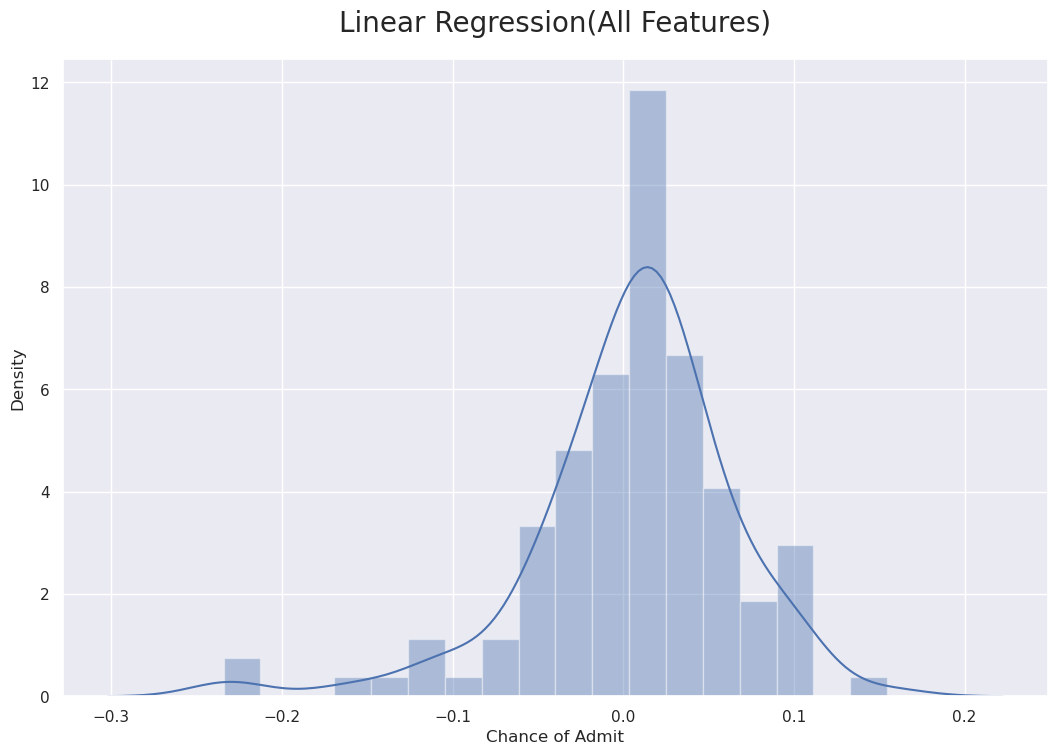

In [74]:
sns.set(rc={'figure.figsize':(12.7,8.27)})
sns.distplot((y_test-y_pred))
plt.title('Linear Regression(All Features) Residuals',fontdict={'fontsize':20},pad=20)
plt.show()

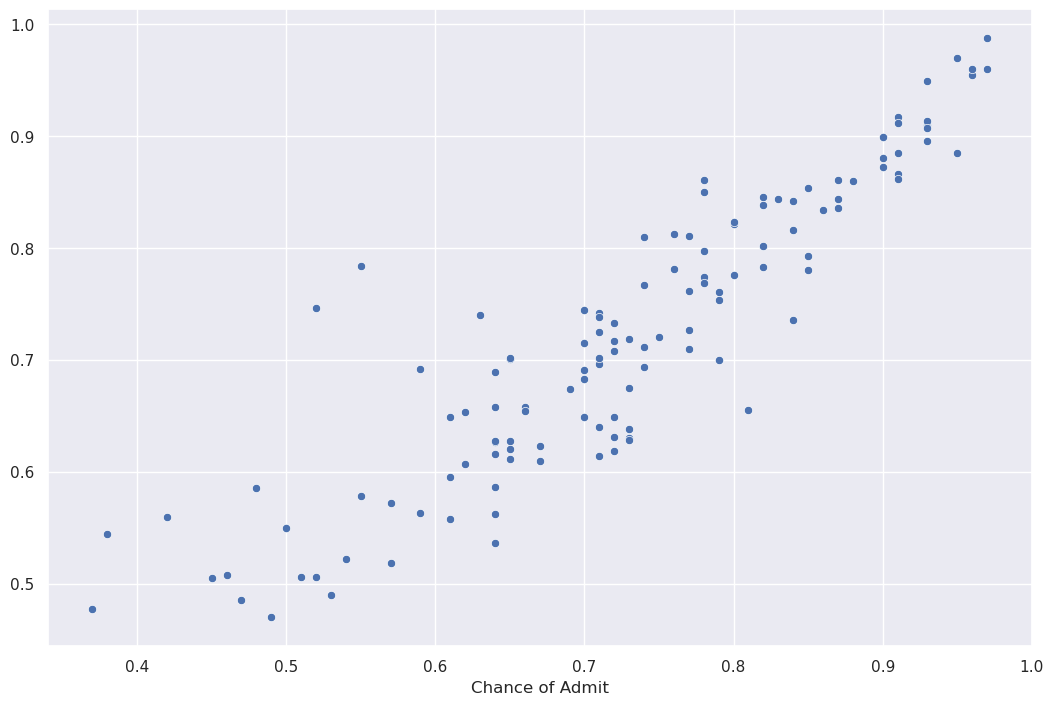

In [76]:
sns.set(rc={'figure.figsize':(12.7,8.27)})
sns.scatterplot(x=y_test,y=y_pred)
plt.show()

In [77]:
# Linear Regression(Selected Features)

In [78]:
X_selected=X[['CGPA','GRE Score','TOEFL Score']]
X_sel_train,X_sel_test,y_train,y_test=train_test_split(X_selected,y,random_state=101)

In [80]:
lr_sel=LinearRegression()
lr_sel.fit(X_sel_train,y_train)

LinearRegression()

In [82]:
lr_sel_pred=lr_sel.predict(X_sel_test)

In [84]:
lr_sel_r2=r2_score(y_test,lr_sel_pred)
lr_sel_mse=mean_squared_error(y_test,lr_sel_pred)
lr_sel_rmse=np.sqrt(lr_sel_mse)
print('Linear Regression R2 Score: {0} \nLinear Regression MSE: {1}, \nLinear Regression RMSE:{2}'.format(lr_sel_r2, lr_sel_mse, lr_sel_rmse))

Linear Regression R2 Score: 0.7891805958364757 
Linear Regression MSE: 0.003959559452342313, 
Linear Regression RMSE:0.06292503041192998


## Random Forest Regressor

In [87]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(n_estimators=100,random_state=101)
rfr.fit(X_train,y_train)
y_pred_rfr=rfr.predict(X_test)

In [89]:
from sklearn.metrics import r2_score
print("r_square score: ", r2_score(y_test, y_pred_rfr))

r_square score:  0.7812698788611929


## Decision Tree

In [90]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state = 101)
dtr.fit(X_train,y_train)
y_head_dtr = dtr.predict(X_test)

In [91]:
from sklearn.metrics import r2_score
print("r_square score: ", r2_score(y_test,y_head_dtr))

r_square score:  0.6175012352409999


In [92]:
y=np.array([r2_score(y_test,y_pred),r2_score(y_test,y_pred_rfr),r2_score(y_test,y_head_dtr)])

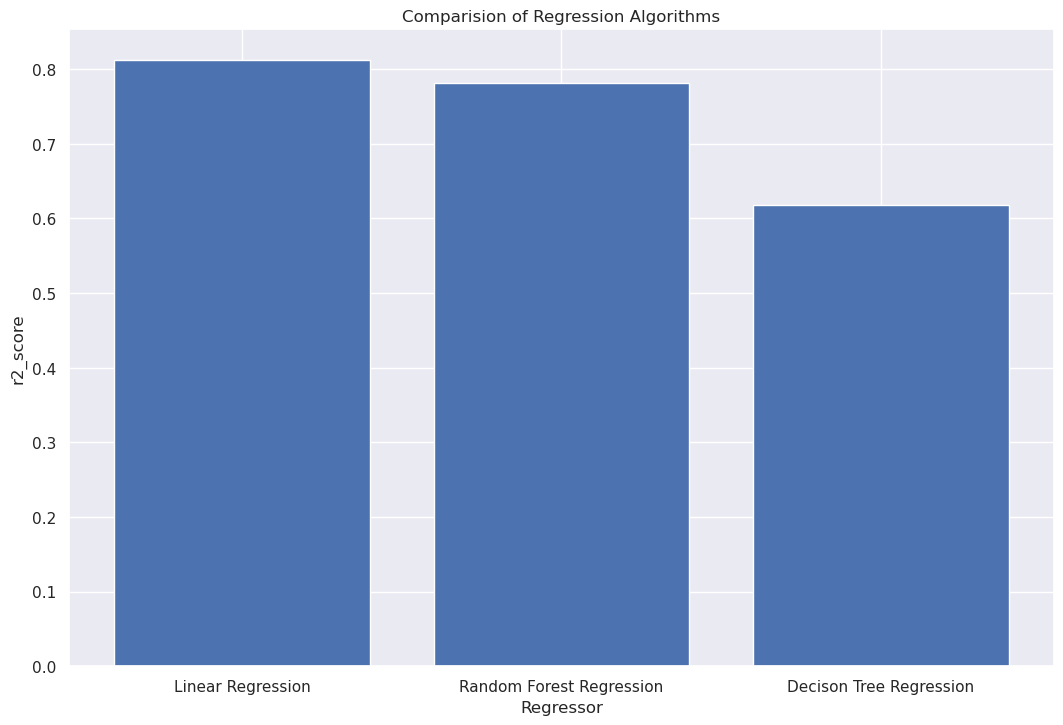

In [93]:
x=['Linear Regression', 'Random Forest Regression','Decison Tree Regression']
plt.bar(x,y)
plt.title('Comparision of Regression Algorithms')
plt.xlabel('Regressor')
plt.ylabel('r2_score')
plt.show()

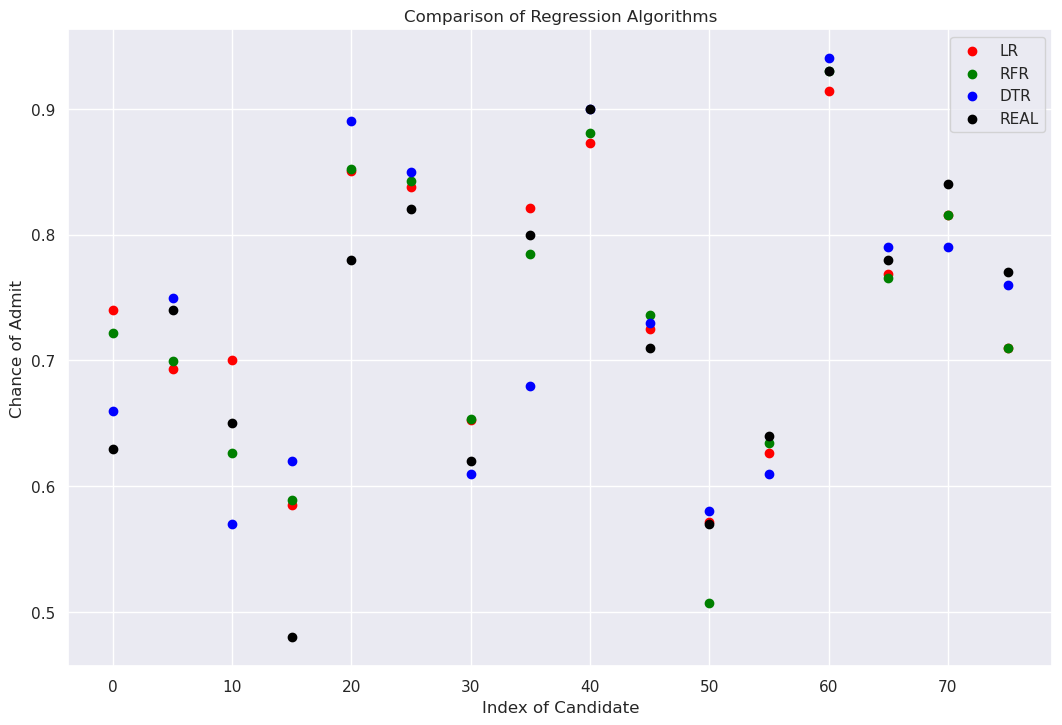

In [94]:
red = plt.scatter(np.arange(0,80,5),y_pred[0:80:5],color = "red")
green = plt.scatter(np.arange(0,80,5),y_pred_rfr[0:80:5],color = "green")
blue = plt.scatter(np.arange(0,80,5),y_head_dtr[0:80:5],color = "blue")
black = plt.scatter(np.arange(0,80,5),y_test[0:80:5],color = "black")
plt.title("Comparison of Regression Algorithms")
plt.xlabel("Index of Candidate")
plt.ylabel("Chance of Admit")
plt.legend((red,green,blue,black),('LR', 'RFR', 'DTR', 'REAL'))
plt.show()

In [95]:
# Because most candidates in the data have over 70% chance, many unsuccessful candidates are not well predicted

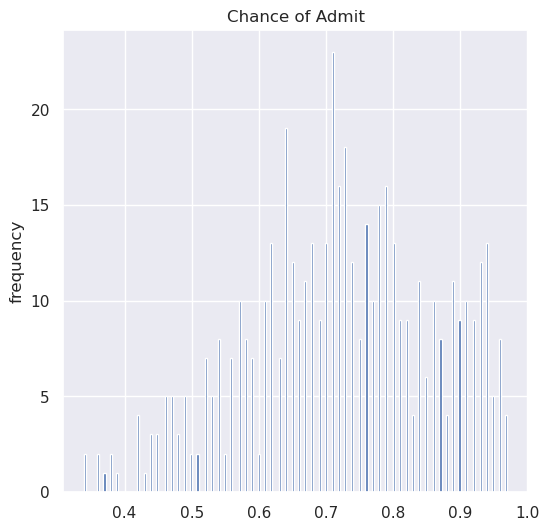

In [96]:
data['Chance of Admit'].plot(kind='hist',bins=200,figsize=(6,6))
plt.title('Chance of Admit')
plt.ylabel('frequency')
plt.show()

## Neural Network

In [99]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

model=Sequential()
model.add(Dense(7,activation='relu',input_dim=7))
model.add(Dense(7,activation='relu'))
model.add(Dense(1, activation='linear'))
model.summary()

2023-07-01 19:17:30.990140: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-07-01 19:17:32.925008: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 7)                 56        
                                                                 
 dense_1 (Dense)             (None, 7)                 56        
                                                                 
 dense_2 (Dense)             (None, 1)                 8         
                                                                 
Total params: 120
Trainable params: 120
Non-trainable params: 0
_________________________________________________________________


In [100]:
model.compile(loss='mean_squared_error', optimizer='Adam')
history=model.fit(X_train,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
10/10 [==============================] - 1s 17ms/step - loss: 13.2972 - val_loss: 12.1052
Epoch 2/100
10/10 [==============================] - 0s 3ms/step - loss: 10.5488 - val_loss: 9.7392
Epoch 3/100
10/10 [==============================] - 0s 3ms/step - loss: 8.5612 - val_loss: 7.8783
Epoch 4/100
10/10 [==============================] - 0s 3ms/step - loss: 6.9949 - val_loss: 6.3485
Epoch 5/100
10/10 [==============================] - 0s 3ms/step - loss: 5.6978 - val_loss: 5.0505
Epoch 6/100
10/10 [==============================] - 0s 3ms/step - loss: 4.5608 - val_loss: 3.8972
Epoch 7/100
10/10 [==============================] - 0s 3ms/step - loss: 3.5177 - val_loss: 2.7510
Epoch 8/100
10/10 [==============================] - 0s 3ms/step - loss: 2.5286 - val_loss: 1.7186
Epoch 9/100
10/10 [==============================] - 0s 3ms/step - loss: 1.6926 - val_loss: 1.0219
Epoch 10/100
10/10 [==============================] - 0s 3ms/step - loss: 1.1419 - val_loss: 0.7457
Epoch

Epoch 83/100
10/10 [==============================] - 0s 3ms/step - loss: 0.0283 - val_loss: 0.0359
Epoch 84/100
10/10 [==============================] - 0s 3ms/step - loss: 0.0279 - val_loss: 0.0351
Epoch 85/100
10/10 [==============================] - 0s 3ms/step - loss: 0.0275 - val_loss: 0.0351
Epoch 86/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0270 - val_loss: 0.0343
Epoch 87/100
10/10 [==============================] - 0s 3ms/step - loss: 0.0266 - val_loss: 0.0337
Epoch 88/100
10/10 [==============================] - 0s 3ms/step - loss: 0.0262 - val_loss: 0.0329
Epoch 89/100
10/10 [==============================] - 0s 3ms/step - loss: 0.0257 - val_loss: 0.0330
Epoch 90/100
10/10 [==============================] - 0s 2ms/step - loss: 0.0254 - val_loss: 0.0326
Epoch 91/100
10/10 [==============================] - 0s 3ms/step - loss: 0.0250 - val_loss: 0.0316
Epoch 92/100
10/10 [==============================] - 0s 3ms/step - loss: 0.0246 - val_loss: 0.0313


In [106]:
y_pred_ann=model.predict(X_test)
r2_score(y_test,y_pred)

4/4 [==============================] - 0s 936us/step


0.8126327365181198

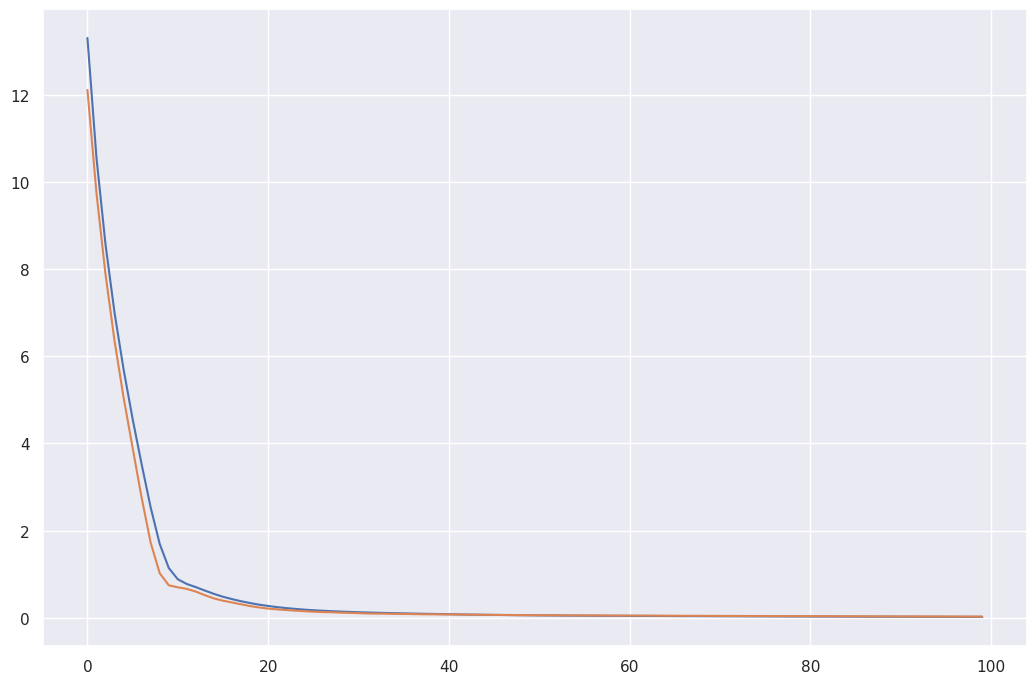

In [107]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [134]:
# Linear Regression is giving the best results
data

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


In [135]:
from sklearn.pipeline import Pipeline
pipeline=Pipeline([('preprocess',StandardScaler()),('reg',LinearRegression())])

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
433,-0.041830,0.626751,4,4.0,5.0,-0.060310,0
154,0.844393,0.132987,3,3.0,3.5,0.518961,0
200,0.046793,-0.689952,3,2.5,3.0,-0.060310,1
53,0.667148,0.791338,4,4.0,2.5,-0.788537,1
385,1.641993,1.614278,5,5.0,5.0,2.058166,1
...,...,...,...,...,...,...,...
63,-0.130452,-0.031601,2,4.0,3.0,-0.126513,1
326,-1.548408,-1.183716,3,2.0,2.0,-0.920942,0
337,1.376126,1.778865,5,5.0,5.0,1.478895,1
11,0.933015,0.626751,4,4.0,4.5,0.701017,1


In [136]:
X1=data.drop(['Chance of Admit'],axis=1)
y1=data['Chance of Admit']

In [248]:
X1

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1
496,337,117,5,5.0,5.0,9.87,1
497,330,120,5,4.5,5.0,9.56,1
498,312,103,4,4.0,5.0,8.43,0


In [137]:
X_train1,X_test1,y_train1,y_test1=train_test_split(X1,y1,random_state=101)

In [138]:
pipeline.fit(X_train1,y_train1)

Pipeline(steps=[('preprocess', StandardScaler()), ('reg', LinearRegression())])

In [250]:
y_pred1=pipeline.predict()

/home/adarsh/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [141]:
r2_score(y_test1,y_pred1)

0.8126327365181197

In [145]:
import pickle
model_filepath='../models/reg.pkl'

In [146]:
pickle.dump(pipeline,open(model_filepath,'wb'))

## Clustering

/home/adarsh/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/adarsh/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/adarsh/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/adarsh/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/adarsh/anacond

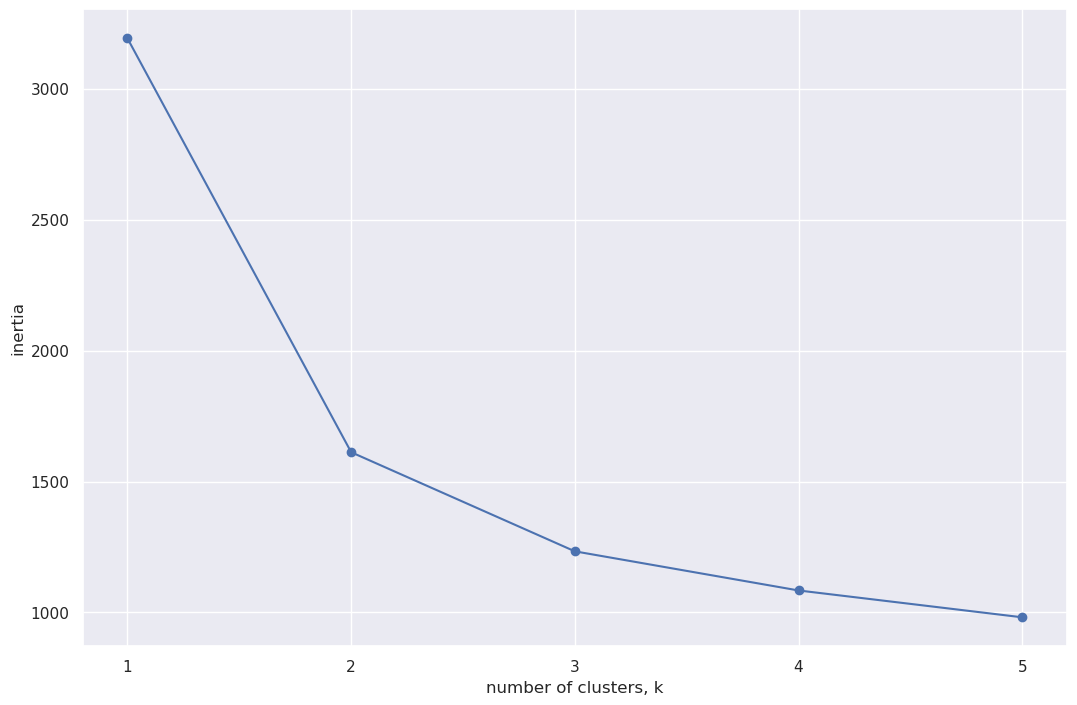

In [149]:
# Elbow graph
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
ks=range(1,6)
inertias=[]

for k in ks:
    model=KMeans(n_clusters=k)
    model.fit(X)
    inertias.append(model.inertia_)
plt.plot(ks,inertias,'-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [153]:
model=Pipeline([('scale',StandardScaler()),('clu',KMeans(n_clusters=3))])

In [155]:
model.fit(data)

/home/adarsh/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Pipeline(steps=[('scale', StandardScaler()), ('clu', KMeans(n_clusters=3))])

In [156]:
data['cluster']=model.predict(data)

In [182]:
data[data.columns[:-1]]

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


In [184]:
# Visualizing the clusters using PCA
model_pca=PCA()
df_scale = data.copy()
df_scale[data.columns[0:8]]=scaler.fit_transform(data[data.columns[:-1]])


In [185]:
df_scale

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,cluster
0,1.819238,1.778865,0.775582,1.137360,1.098944,1.776806,0.886405,1.406107,0
1,0.667148,-0.031601,0.775582,0.632315,1.098944,0.485859,0.886405,0.271349,2
2,-0.041830,-0.525364,-0.099793,-0.377773,0.017306,-0.954043,0.886405,-0.012340,2
3,0.489904,0.462163,-0.099793,0.127271,-1.064332,0.154847,0.886405,0.555039,2
4,-0.219074,-0.689952,-0.975168,-1.387862,-0.523513,-0.606480,-1.128152,-0.508797,1
...,...,...,...,...,...,...,...,...,...
495,1.376126,0.132987,1.650957,1.137360,0.558125,0.734118,0.886405,1.051495,0
496,1.819238,1.614278,1.650957,1.642404,1.639763,2.140919,0.886405,1.689797,0
497,1.198882,2.108041,1.650957,1.137360,1.639763,1.627851,0.886405,1.477030,0
498,-0.396319,-0.689952,0.775582,0.632315,1.639763,-0.242367,-1.128152,0.058582,2


In [189]:
pca_features=model_pca.fit_transform(df_scale[data.columns[:-1]])

In [190]:
pca_features[0]

array([-3.84066858, -0.32604633, -0.56989298, -0.40989385, -0.24219817,
        0.17140725,  0.1062495 , -0.21797314])

<Axes: >

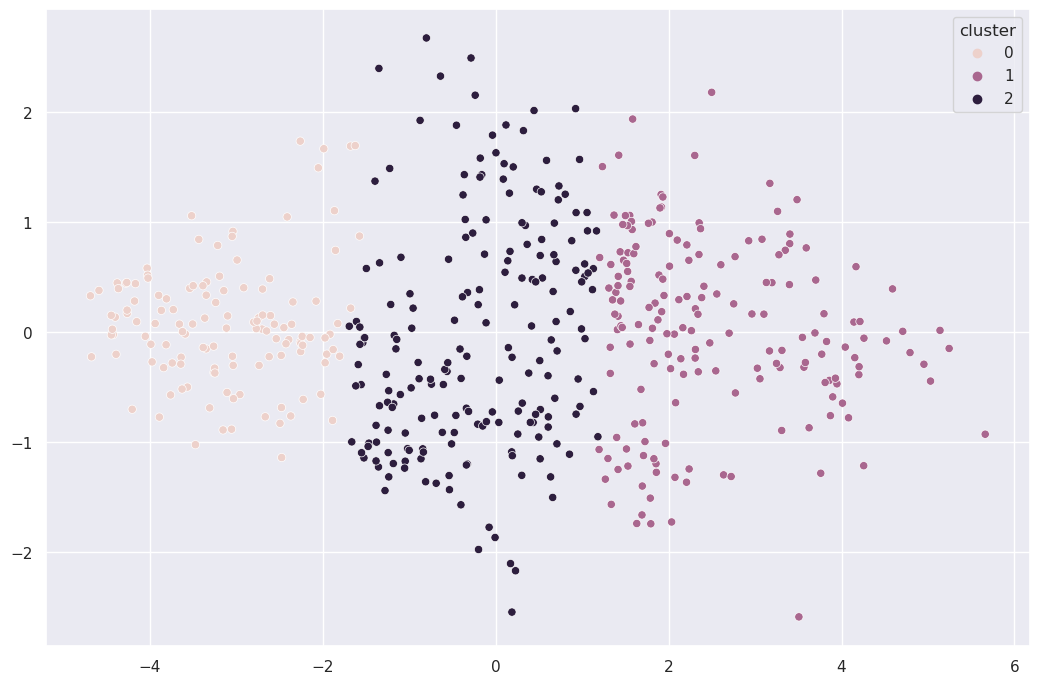

In [191]:
xs=pca_features[:,0]
ys=pca_features[:,1]
sns.scatterplot(x=xs,y=ys,hue='cluster',data=df_scale)

In [192]:
# The cluster works nice! The tree of them represent a significative population and different to the other populations.

<Axes: xlabel='cluster', ylabel='Chance of Admit'>

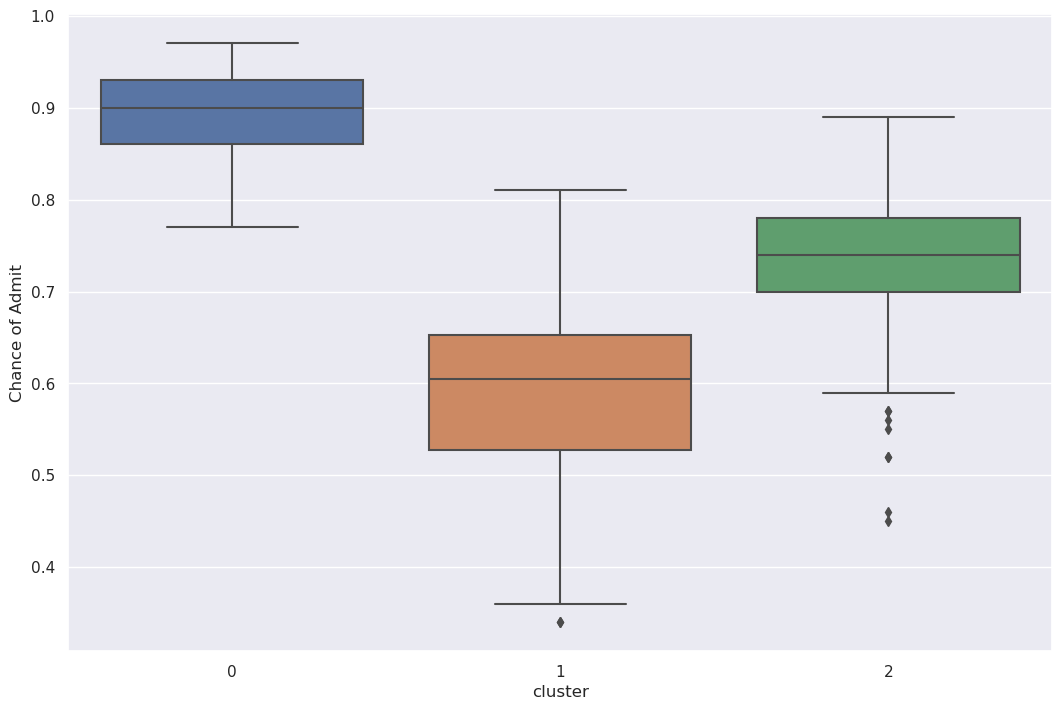

In [193]:
sns.boxplot(x="cluster",y="Chance of Admit", data=data)

In [197]:
data.groupby(['cluster']).mean()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
cluster,,,,,,,,
0,329.406250,114.312500,4.453125,4.453125,4.371094,9.321719,0.929688,0.893437
1,305.840909,101.545455,2.181818,2.468750,2.707386,7.987045,0.215909,0.587159
2,317.571429,107.612245,3.076531,3.482143,3.602041,8.618980,0.627551,0.730459


<Axes: ylabel='cluster'>

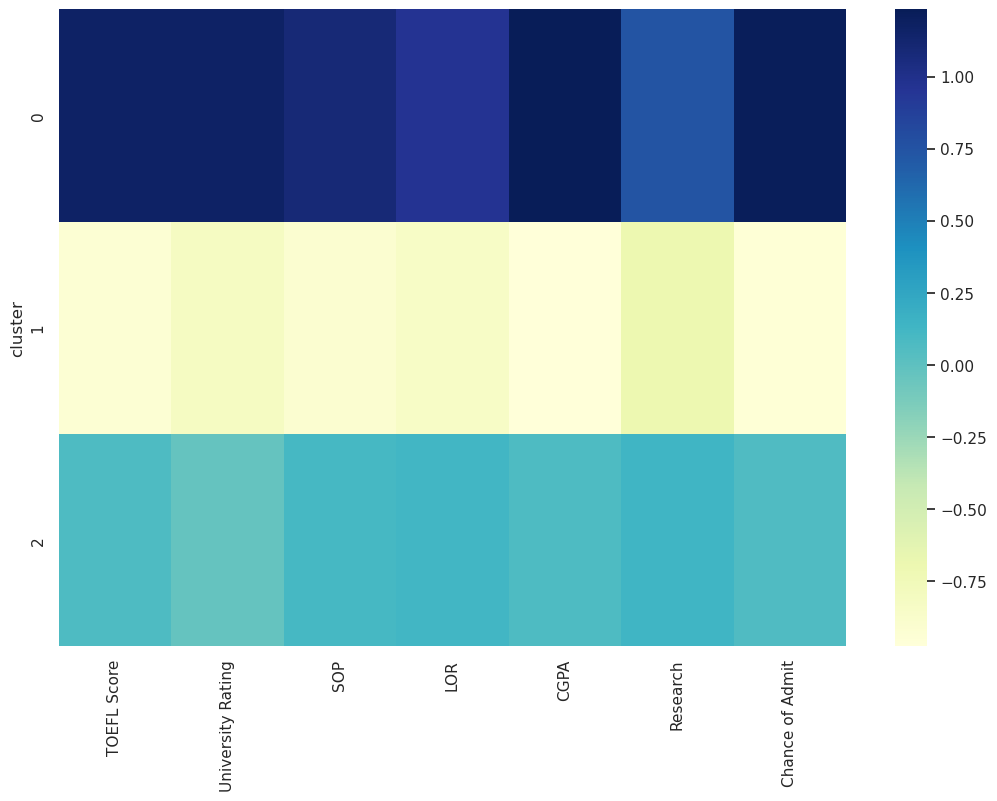

In [201]:

sns.heatmap(df_scale.iloc[:,1:10].groupby(['cluster']).mean(), cmap="YlGnBu")


In [202]:
# Cluster 0: Top students
# Cluster 1: Aspirational Students
# Cluster 2: Average Students

In [203]:
pickle.dump(model,open('../models/clus.pkl','wb'))

In [206]:
data.drop(['cluster'],axis=1,inplace=True)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,1.819238,1.778865,4,4.5,4.5,1.776806,1
1,0.667148,-0.031601,4,4.0,4.5,0.485859,1
2,-0.041830,-0.525364,3,3.0,3.5,-0.954043,1
3,0.489904,0.462163,3,3.5,2.5,0.154847,1
4,-0.219074,-0.689952,2,2.0,3.0,-0.606480,0
...,...,...,...,...,...,...,...
495,1.376126,0.132987,5,4.5,4.0,0.734118,1
496,1.819238,1.614278,5,5.0,5.0,2.140919,1
497,1.198882,2.108041,5,4.5,5.0,1.627851,1
498,-0.396319,-0.689952,4,4.0,5.0,-0.242367,0


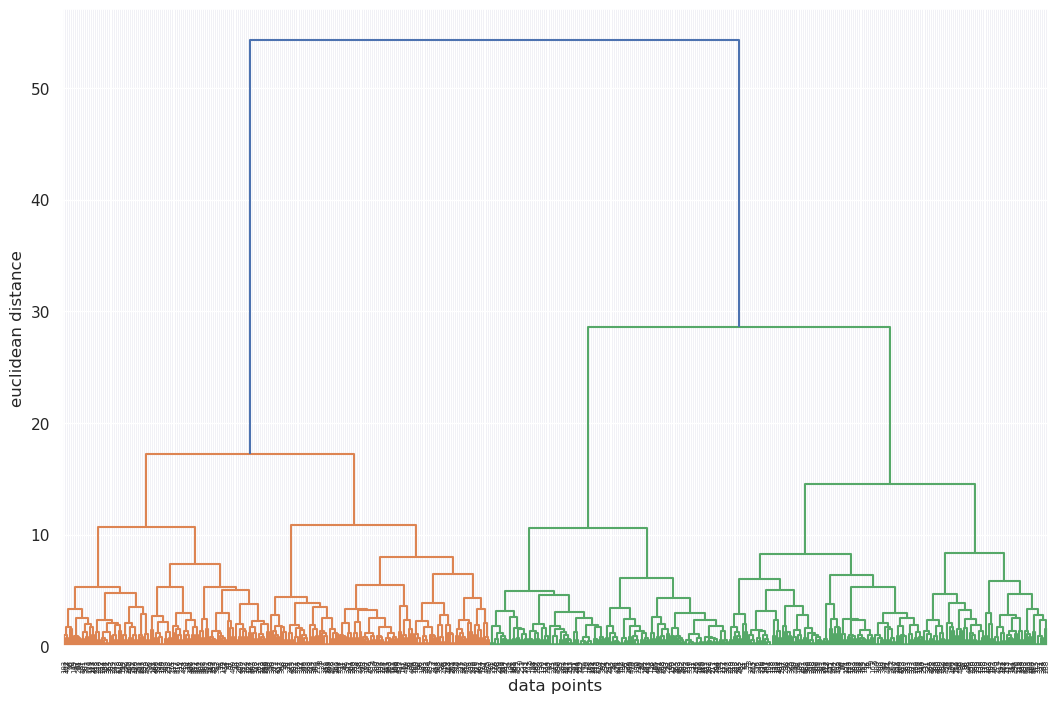

In [210]:
from scipy.cluster.hierarchy import linkage,dendrogram
merg=linkage(X,method="ward")
dendrogram(merg,leaf_rotation=90)
plt.xlabel('data points')
plt.ylabel('euclidean distance')
plt.show()

In [214]:
from sklearn.cluster import AgglomerativeClustering
hiyerartical_cluster=AgglomerativeClustering(n_clusters=3, affinity="euclidean",linkage="ward")

In [215]:
clusters_hiyerartical = hiyerartical_cluster.fit_predict(X)

/home/adarsh/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


KeyError: 'Serial No.'

In [294]:
import joblib
model2=joblib.load("../models/reg.pkl")

In [295]:
tes=[[330,117,4,4.0,4.3,8.9,1]]

In [296]:
tes=pd.DataFrame([[330,117,4,4.0,4.3,8.9,1]])

In [297]:
model2.predict(tes)

/home/adarsh/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([0.84177153])

In [304]:
tes=[[330,117,4,4.0,4.3,8.9,1]]

In [305]:
tes[0].append(0.84)

In [306]:
tes

[[330, 117, 4, 4.0, 4.3, 8.9, 1, 0.84]]

In [307]:
model3=joblib.load("../models/clus.pkl")

In [308]:
model3.predict(tes)

/home/adarsh/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([0], dtype=int32)